## Weather Data Analysis

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WeatherData.csv")

In [4]:
# Display basic information about the data
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [5]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
df.shape

(8784, 8)

In [7]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [8]:
column = df.columns
for columns in column:
    print("->",columns)

-> Date/Time
-> Temp_C
-> Dew Point Temp_C
-> Rel Hum_%
-> Wind Speed_km/h
-> Visibility_km
-> Press_kPa
-> Weather


In [9]:
# Display basic statistics of the data
print("\nData Statistics:")
print(df.describe().transpose())


Data Statistics:
                   count        mean        std    min     25%     50%  \
Temp_C            8784.0    8.798144  11.687883 -23.30    0.10    9.30   
Dew Point Temp_C  8784.0    2.555294  10.883072 -28.50   -5.90    3.30   
Rel Hum_%         8784.0   67.431694  16.918881  18.00   56.00   68.00   
Wind Speed_km/h   8784.0   14.945469   8.688696   0.00    9.00   13.00   
Visibility_km     8784.0   27.664447  12.622688   0.20   24.10   25.00   
Press_kPa         8784.0  101.051623   0.844005  97.52  100.56  101.07   

                     75%     max  
Temp_C             18.80   33.00  
Dew Point Temp_C   11.80   24.40  
Rel Hum_%          81.00  100.00  
Wind Speed_km/h    20.00   83.00  
Visibility_km      25.00   48.30  
Press_kPa         101.59  103.65  


In [10]:
# Renaming columns for consistency
df.rename(columns={'Rel Hum_%': 'Humidity', 'Weather': 'Weather_condition'}, inplace=True)

In [11]:
# Check for missing values in each column
missing_values_per_column = df.isnull().sum()

# Check if there are any missing values in the entire DataFrame
any_missing_values = df.isnull().any().any()

# Print the results
print("Missing values per column:")
print(missing_values_per_column)

print("\nAre there any missing values in the DataFrame? ", any_missing_values)

Missing values per column:
Date/Time            0
Temp_C               0
Dew Point Temp_C     0
Humidity             0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather_condition    0
dtype: int64

Are there any missing values in the DataFrame?  False


In [12]:
df.nunique()

Date/Time            8784
Temp_C                533
Dew Point Temp_C      489
Humidity               83
Wind Speed_km/h        34
Visibility_km          24
Press_kPa             518
Weather_condition      50
dtype: int64

In [13]:
df['Weather_condition'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [14]:
# Count of each weather condition
print("\nCount of each weather condition:")
df['Weather_condition'].value_counts()


Count of each weather condition:


Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [15]:
# Data Exploration
print("\nNumber of unique values in each column:")
print(df.nunique())
print("\nUnique weather conditions:")
print(df['Weather_condition'].unique())


Number of unique values in each column:
Date/Time            8784
Temp_C                533
Dew Point Temp_C      489
Humidity               83
Wind Speed_km/h        34
Visibility_km          24
Press_kPa             518
Weather_condition      50
dtype: int64

Unique weather conditions:
['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rai

In [16]:
 # Show all records where weather condition is 'Clear'
print("\nRecords where Weather Condition is Clear:")
print(df[df['Weather_condition'] == 'Clear'])


Records where Weather Condition is Clear:
             Date/Time  Temp_C  Dew Point Temp_C  Humidity  Wind Speed_km/h  \
67      1/3/2012 19:00   -16.9             -24.8        50               24   
114     1/5/2012 18:00    -7.1             -14.4        56               11   
115     1/5/2012 19:00    -9.2             -15.4        61                7   
116     1/5/2012 20:00    -9.8             -15.7        62                9   
117     1/5/2012 21:00    -9.0             -14.8        63               13   
...                ...     ...               ...       ...              ...   
8646   12/26/2012 6:00   -13.4             -14.8        89                4   
8698  12/28/2012 10:00    -6.1              -8.6        82               19   
8713   12/29/2012 1:00   -11.9             -13.6        87               11   
8714   12/29/2012 2:00   -11.8             -13.1        90               13   
8756  12/30/2012 20:00   -13.8             -16.5        80               24   

      Vi

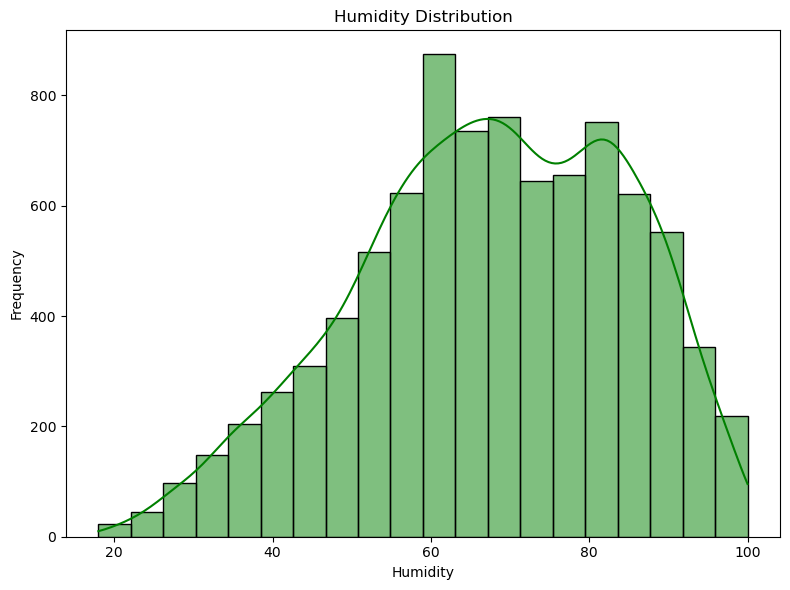

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Humidity'], bins=20, color='green', kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

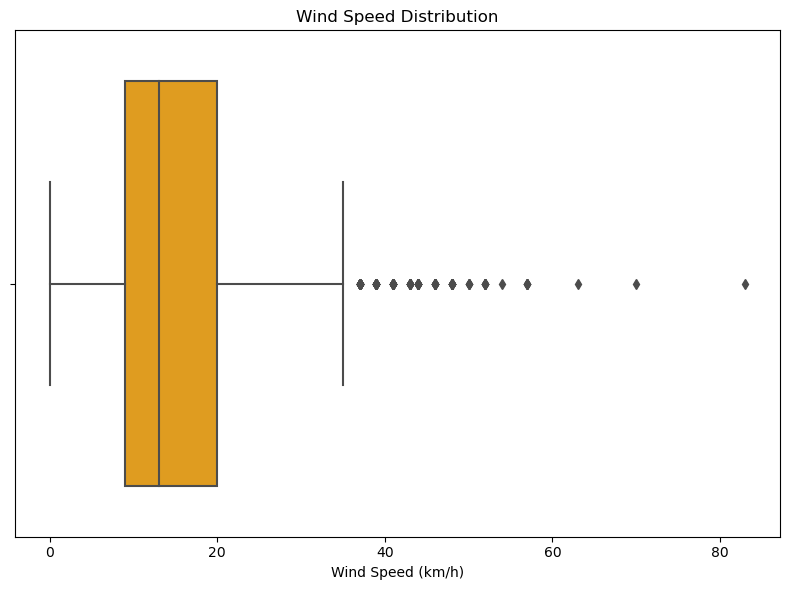

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Wind Speed_km/h'], color='orange')
plt.xlabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

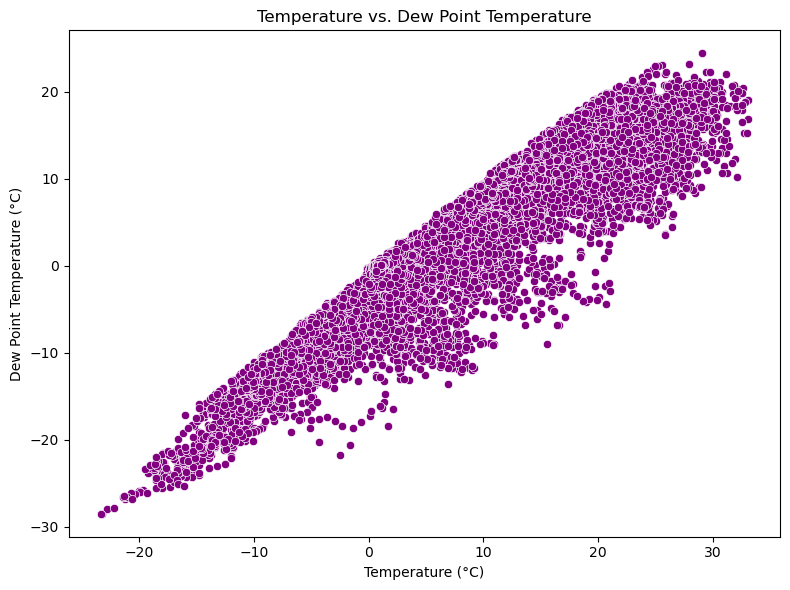

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=df, color='purple')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()

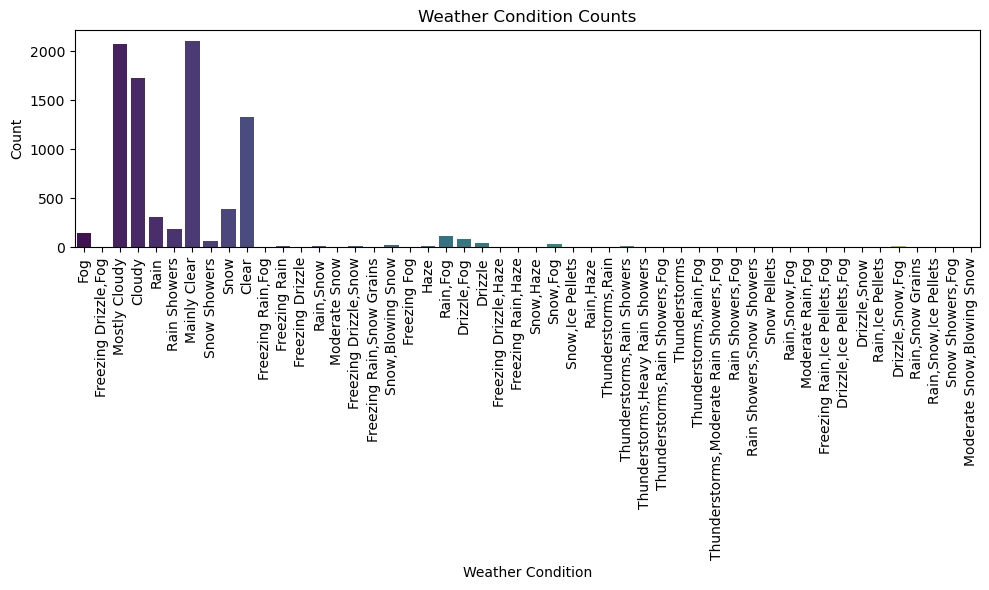

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_condition', data=df, palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Time-Based Analysis:

In [21]:
# Convert 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [22]:
# Extract and create new columns for Year, Month, Day, and Hour
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

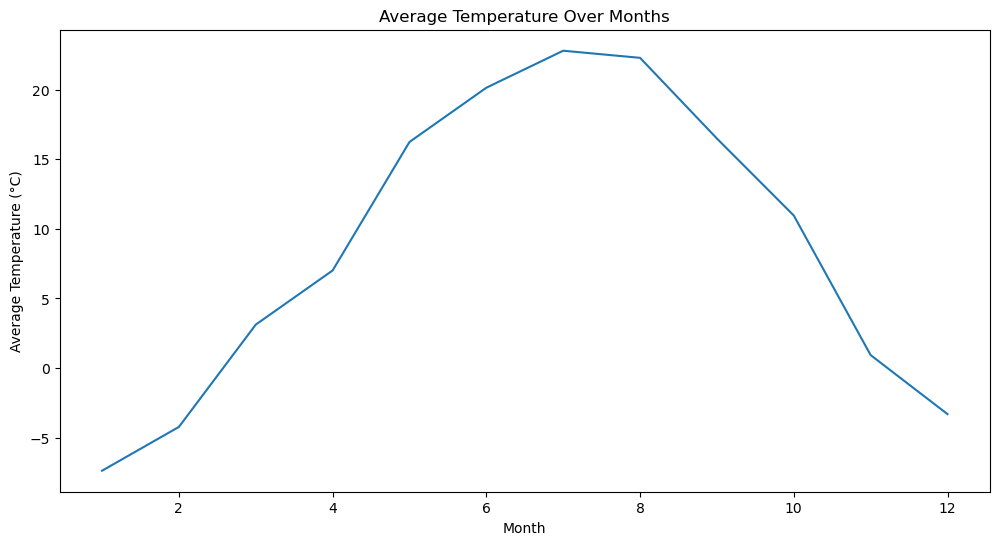

In [23]:
# Plot average temperature over months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temp_C', data=df.groupby('Month')['Temp_C'].mean().reset_index())
plt.title('Average Temperature Over Months')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

#### This plot can provide insights into the seasonal variations in temperature.It shows higher temperatures in summer months and lower temperatures in winter months.

### Correlation Analysis:

In [24]:
# Check the actual column names in the DataFrame
print(df.columns)

# Make sure the column name is correct and without leading/trailing whitespaces
column_name = 'Weather_condition'
if column_name in df.columns:
    data_encoded = pd.get_dummies(df, columns=[column_name])
    correlation_matrix = data_encoded.corr()
    print(correlation_matrix)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Humidity',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather_condition',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
                                                      Temp_C  \
Temp_C                                              1.000000   
Dew Point Temp_C                                    0.932714   
Humidity                                           -0.220182   
Wind Speed_km/h                                    -0.061876   
Visibility_km                                       0.273455   
Press_kPa                                          -0.236389   
Year                                                     NaN   
Month                                               0.218048   
Day                                                 0.009300   
Hour                                                0.106888   
Weather_condition_Clear                            -0.071162   
Weather_condition_Cloudy       

C:\Users\iPC\AppData\Local\Temp\ipykernel_9928\1109985315.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


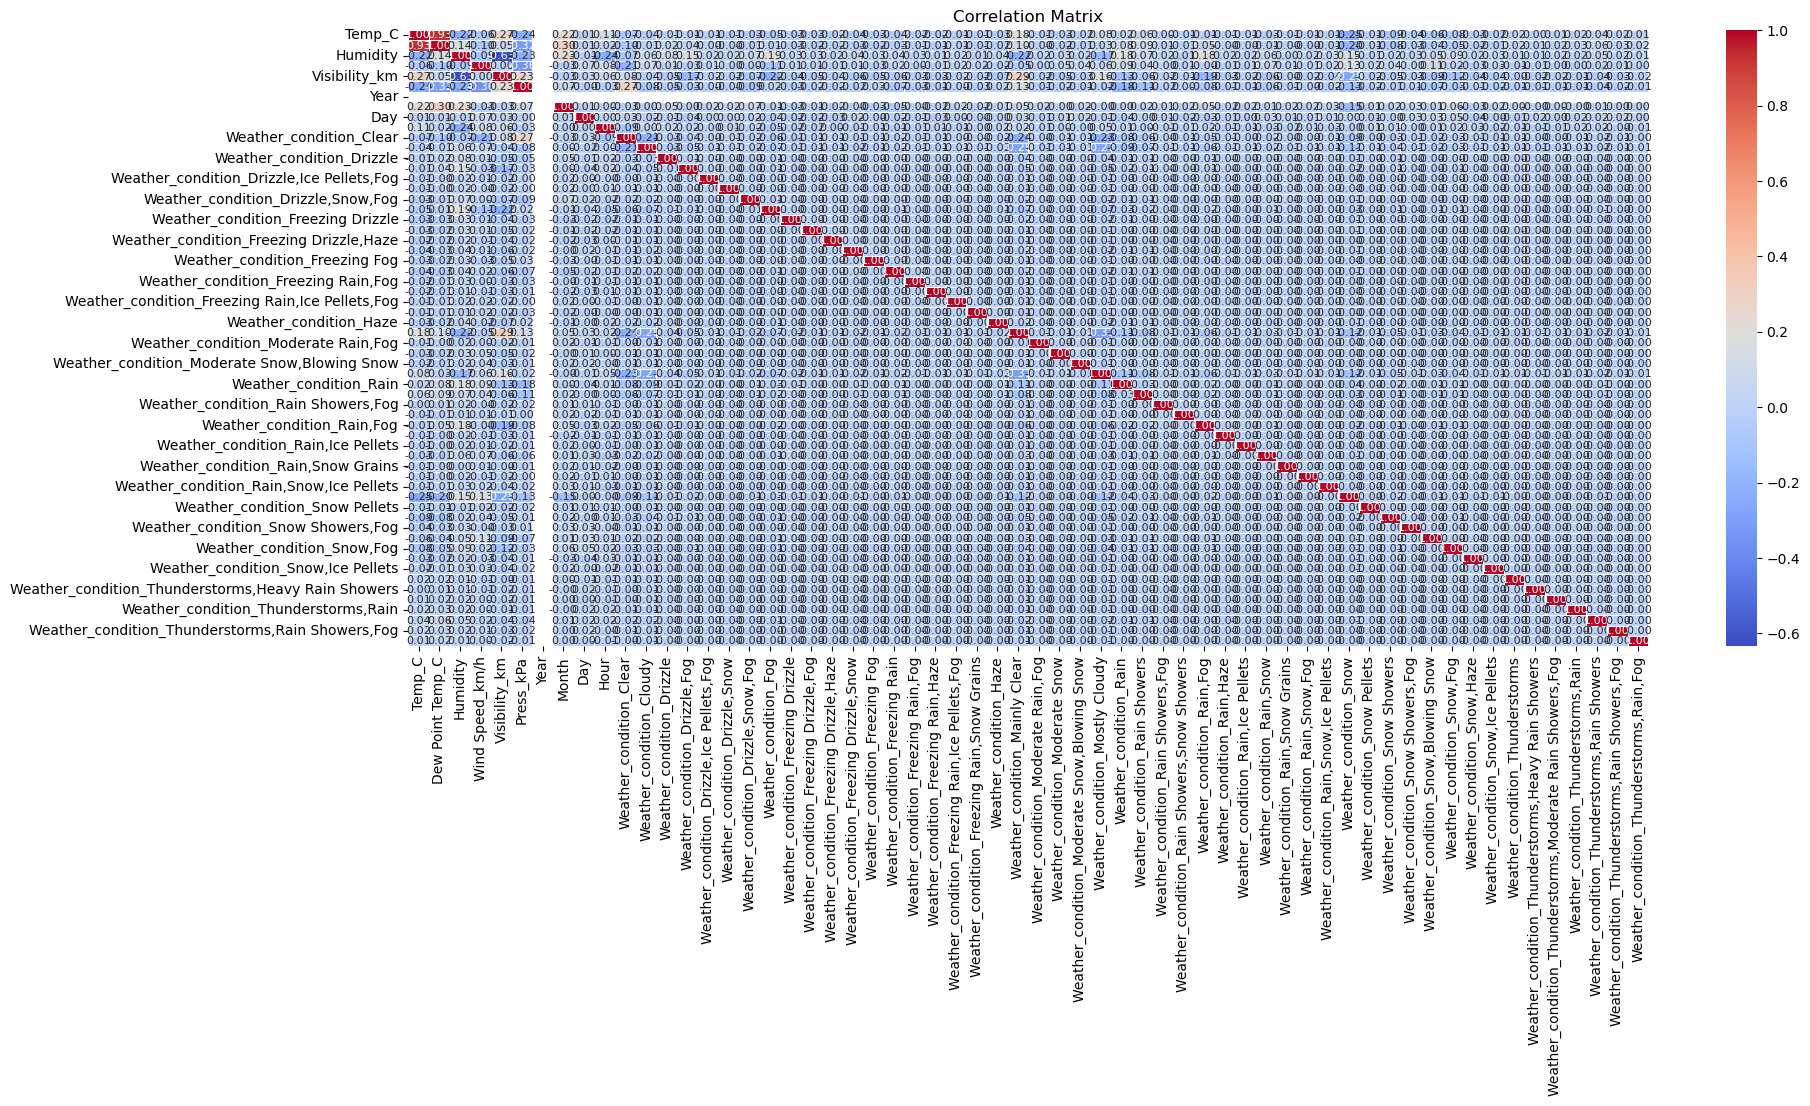

In [27]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

##### The correlation matrix can help identify relationships between different weather variables.


### Wind Speed Analysis:

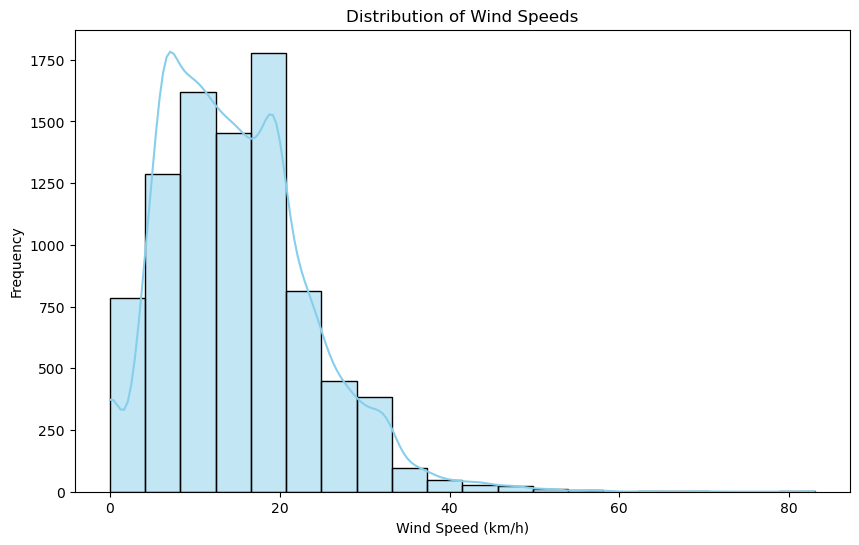

In [28]:
# Plot a histogram of wind speeds
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind Speed_km/h'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

##### The histogram of wind speeds provides an overview of the frequency of different wind speeds. It shows the most of the time the wind speed is nearer to 20km/h.

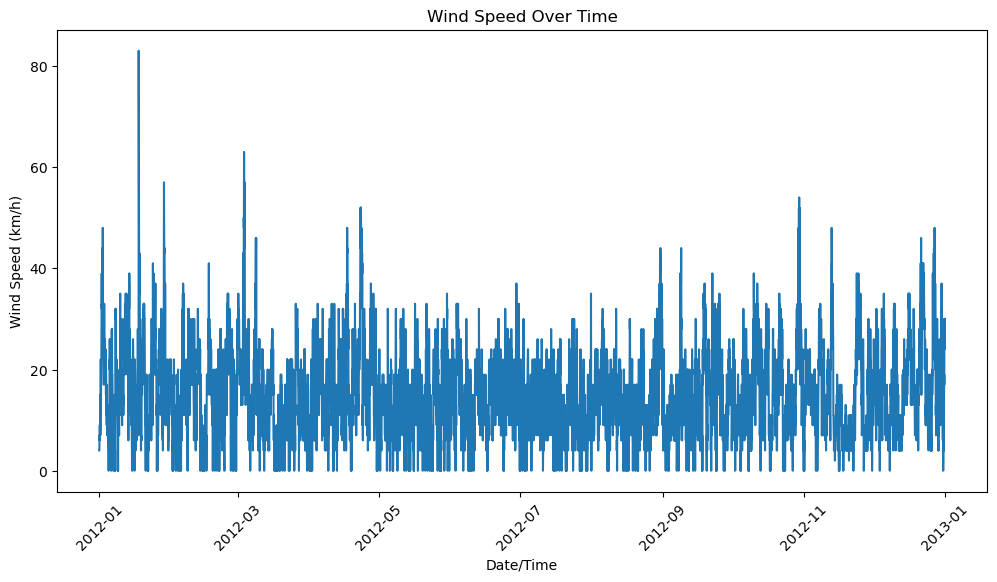

In [29]:
# Plot wind speed over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Wind Speed_km/h', data=df)
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.show()

##### The line plot of wind speed over time can reveal trends or patterns in wind behavior. Sudden spikes in wind speed indicate storms or turbulent weather periods.

### Conclusion: What We Learned from Analyzing Weather Data

##### In summary, our exploration of the weather data has uncovered some really interesting things about the weather 
##### over the time we studied. We used numbers and pictures to get a better idea of how the weather works.

#### Important Discoveries:
#### 1. Seasons and Daily Changes:

##### We noticed that the weather changes a lot throughout the year. It gets warmer in the summer and colder in the 
##### winter. And from day to day, the weather can be all over the place, with temperatures, humidity, and other 
##### things going up and down.

#### 2. How Things Are Connected:

##### We found out that some parts of the weather are related. For example, when it's hot, it's often more humid. 
##### We used a special tool to see how different weather things are linked, helping us see how one thing can affect others.

#### 3. Wind Speed Patterns:

##### We also looked at how fast the wind blows. Most of the time, it's pretty calm, but sometimes it gets windy. 
##### This helps us understand when strong winds might happen, which is important for things like making electricity and moving goods around.

#### 4. Sorting Out Different Weather:

##### We sorted the weather into different categories like clear days, snowy days, and foggy days. This helped us
##### see how often each type of weather happens and how long it lasts. Knowing this helps us get ready for different 
##### weather conditions.

#### 5. What It All Means:

##### The things we learned from our study can be useful in lots of ways. For example, when planning cities, farming, or 
##### dealing with emergencies, understanding the weather's ups and downs is really important. It helps us make better 
##### decisions.

#### What We Can't Ignore and What's Next:

##### We should remember that our study had some limits. The weather data might not be perfect, and there are
##### local weather events that we didn't account for. In the future, we can make our study better by using more data 
##### and fancier tools to make predictions about the weather more accurate.

##### So, to sum it up, our study gives us a big picture of the weather data we looked at. This information helps 
##### us understand how the weather works and can be a starting point for more detailed studies, improving weather 
##### forecasts, and coming up with plans to deal with extreme weather.